In [1]:
import torch
import torchvision

dummy_input = torch.randn(10, 3, 224, 224,)
model = torchvision.models.alexnet(pretrained=True)

# Providing input and output names sets the display names for values
# within the model's graph. Setting these does not change the semantics
# of the graph; it is only for readability.
#
# The inputs to the network consist of the flat list of inputs (i.e.
# the values you would pass to the forward() method) followed by the
# flat list of parameters. You can partially specify names, i.e. provide
# a list here shorter than the number of inputs to the model, and we will
# only set that subset of names, starting from the beginning.
input_names = [ "actual_input_1" ] + [ "learned_%d" % i for i in range(16) ]
output_names = [ "output1" ]

torch.onnx.export(model, dummy_input, "alexnet.onnx", verbose=True, input_names=input_names, output_names=output_names)




/home/local/ZOHOCORP/abdul-pt6532/miniconda3/envs/py_torch/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/local/ZOHOCORP/abdul-pt6532/miniconda3/envs/py_torch/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Exported graph: graph(%actual_input_1 : Float(10, 3, 224, 224, strides=[150528, 50176, 224, 1], requires_grad=0, device=cpu),
      %learned_0 : Float(64, 3, 11, 11, strides=[363, 121, 11, 1], requires_grad=1, device=cpu),
      %learned_1 : Float(64, strides=[1], requires_grad=1, device=cpu),
      %learned_2 : Float(192, 64, 5, 5, strides=[1600, 25, 5, 1], requires_grad=1, device=cpu),
      %learned_3 : Float(192, strides=[1], requires_grad=1, device=cpu),
      %learned_4 : Float(384, 192, 3, 3, strides=[1728, 9, 3, 1], requires_grad=1, device=cpu),
      %learned_5 : Float(384, strides=[1], requires_grad=1, device=cpu),
      %learned_6 : Float(256, 384, 3, 3, strides=[3456, 9, 3, 1], requires_grad=1, device=cpu),
      %learned_7 : Float(256, strides=[1], requires_grad=1, device=cpu),
      %learned_8 : Float(256, 256, 3, 3, strides=[2304, 9, 3, 1], requires_grad=1, device=cpu),
      %learned_9 : Float(256, strides=[1], requires_grad=1, device=cpu),
      %learned_10 : Float(409

torch.Size([33968])


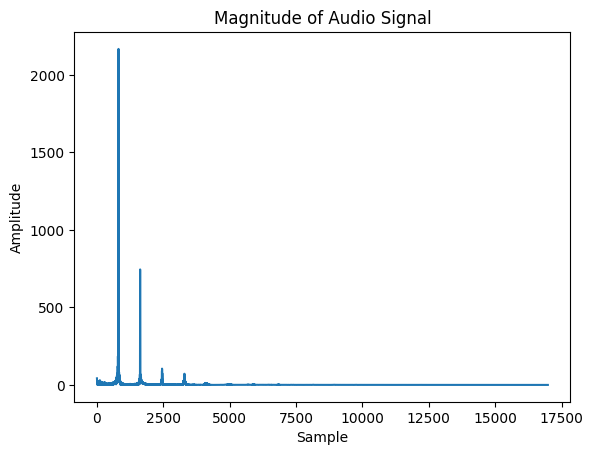

tensor([4.2617e+01, 3.4917e+01, 3.0868e+01,  ..., 4.1892e-03, 4.1811e-03,
        4.1904e-03])


In [3]:
import torch
import numpy as np
import librosa
import matplotlib.pyplot as plt

def audio_to_magnitude(path):
    # Load audio file
    audio, sr = librosa.load(path)
    
    # Convert audio to tensor
    audio = torch.tensor(audio, dtype=torch.float32)
    print(audio.shape)
    # Apply RFFT
    audio_fft = torch.fft.rfft(audio)
    
    # Get magnitude
    magnitude = torch.abs(audio_fft)
    plt.plot(magnitude.numpy())
    plt.title("Magnitude of Audio Signal")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.show()
    print(magnitude)
    return magnitude

audio_path="audio.wav"

mag=audio_to_magnitude(audio_path)


In [ ]:
import librosa
import numpy as np
import torch
import matplotlib.pyplot as plt

def get_magnitude(audio_file):
    # Load the audio file
    audio, sr = librosa.load(audio_file)

    # Convert the audio signal to a PyTorch tensor
    audio = torch.from_numpy(audio)

    # Calculate the magnitude of the audio signal
    magnitude = torch.abs(audio)

    # Plot the magnitude of the audio signal
    plt.plot(magnitude.numpy())
    plt.title("Magnitude of Audio Signal")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.show()

    return magnitude

# Use the function
magnitude = get_magnitude("audio.wav")
print(magnitude)

In [5]:
import librosa
import numpy as np
import torch
import torch.onnx

def get_magnitude(audio_file):
    # Load the audio file
    audio, sr = librosa.load(audio_file)

    # Convert the audio signal to a PyTorch tensor
    audio = torch.from_numpy(audio)
    print(audio.shape())

    # Calculate the magnitude of the audio signal
    magnitude = torch.abs(audio)

    return magnitude

def export_to_onnx(audio_file):
    # Load the audio file
    audio, sr = librosa.load(audio_file)

    # Convert the audio signal to a PyTorch tensor
    audio = torch.from_numpy(audio).unsqueeze(0)

    # Create a PyTorch model
    model = torch.nn.Sequential(torch.nn.Linear(33968, 1), torch.nn.Sigmoid())
    print(type(model))
    # Export the PyTorch model to the ONNX format
    torch.onnx.export(model, audio, "magnitude.onnx", input_names=["audio"], output_names=["magnitude"],verbose=True)

# Use the function
export_to_onnx("audio.wav")

<class 'torch.nn.modules.container.Sequential'>
Exported graph: graph(%audio : Float(1, 33968, strides=[33968, 1], requires_grad=0, device=cpu),
      %0.weight : Float(1, 33968, strides=[33968, 1], requires_grad=1, device=cpu),
      %0.bias : Float(1, strides=[1], requires_grad=1, device=cpu)):
  %/0/Gemm_output_0 : Float(1, 1, strides=[1, 1], requires_grad=1, device=cpu) = onnx::Gemm[alpha=1., beta=1., transB=1, onnx_name="/0/Gemm"](%audio, %0.weight, %0.bias), scope: torch.nn.modules.container.Sequential::/torch.nn.modules.linear.Linear::0 # /home/local/ZOHOCORP/abdul-pt6532/miniconda3/envs/py_torch/lib/python3.10/site-packages/torch/nn/modules/linear.py:114:0
  %magnitude : Float(1, 1, strides=[1, 1], requires_grad=1, device=cpu) = onnx::Sigmoid[onnx_name="/1/Sigmoid"](%/0/Gemm_output_0), scope: torch.nn.modules.container.Sequential::/torch.nn.modules.activation.Sigmoid::1 # /home/local/ZOHOCORP/abdul-pt6532/miniconda3/envs/py_torch/lib/python3.10/site-packages/torch/nn/modules/ac

In [ ]:
import librosa
import numpy as np
import torch
import torch.onnx

def get_magnitude(audio_file):
#     # Load the audio file
#     audio, sr = librosa.load(audio_file)

#     # Convert the audio signal to a PyTorch tensor
#     audio = torch.from_numpy(audio).unsqueeze(0)

#     # Calculate the magnitude of the audio signal
    magnitude = torch.abs(audio)
    
    return magnitude

def export_to_onnx(audio_file):
    # Load the audio file
    audio, sr = librosa.load(audio_file)

    # Convert the audio signal to a PyTorch tensor
    audio = torch.from_numpy(audio).unsqueeze(0)

    # Export the magnitude calculation as an ONNX model
    torch.onnx.export(get_magnitude, audio, "magnitude.onnx", input_names=["audio"], output_names=["magnitude"])
    
# Use the function
export_to_onnx("audio.wav")

In [9]:
import librosa
import numpy as np
import torch
import torch.onnx

def get_magnitude(audio):
    # Calculate the magnitude of the audio signal
    magnitude = torch.abs(audio)
    
    return magnitude

def export_to_onnx(audio_file):
    # Load the audio file
    audio, sr = librosa.load(audio_file)
    print(audio.shape)
    # Convert the audio signal to a PyTorch tensor
    audio = torch.from_numpy(audio).unsqueeze(0)
    print(audio.shape)
    # Export the magnitude calculation as an ONNX model
    torch.onnx.export(get_magnitude, audio, "magnitude.onnx", input_names=["audio"], output_names=["magnitude"])
    print(type(get_magnitude))
# Use the function
export_to_onnx("audio.wav")

(33968,)
torch.Size([1, 33968])


AttributeError: 'function' object has no attribute 'modules'

In [8]:
import torch
import torch.nn as nn

class MagnitudeModule(nn.Module):
    def forward(self, audio):
        magnitude = torch.abs(audio)
        print(type(magnitude))
        
        return magnitude

def export_to_onnx(audio_file):
    # Load audio file
    
    audio, sr = librosa.load(audio_file)

    
    
    # Convert audio to tensor
    audio = torch.from_numpy(audio).unsqueeze(0)
    
    # Create instance of MagnitudeModule
    magnitude_module = MagnitudeModule()
    
    # Export the magnitude calculation as an ONNX model
    torch.onnx.export(magnitude_module, audio, "magnitude.onnx", input_names=["audio"], output_names=["magnitude"])

export_to_onnx("audio.wav")

<class 'torch.Tensor'>
